In [158]:
import pandas as pd
import numpy as np
import time
import random
import sys
import datetime
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# Handle all my imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [1]:
!pip install streamlit

  Using cached base58-2.1.1-py3-none-any.whl (5.6 kB)
  Using cached altair-4.1.0-py3-none-any.whl (727 kB)
  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
  Using cached protobuf-3.19.1-cp38-cp38-win_amd64.whl (895 kB)
  Using cached validators-0.18.2-py3-none-any.whl (19 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached GitPython-3.1.24-py3-none-any.whl (180 kB)
  Using cached tzlocal-4.1-py3-none-any.whl (19 kB)
  Using cached pyarrow-6.0.0-cp38-cp38-win_amd64.whl (15.5 MB)
  Using cached blinker-1.4-py3-none-any.whl
  Using cached pydeck-0.7.1-py2.py3-none-any.whl (4.3 MB)
  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)


  Using cached tzdata-2021.5-py2.py3-none-any.whl (339 kB)
  Using cached backports.zoneinfo-0.2.1-cp38-cp38-win_amd64.whl (38 kB)
  Using cached pytz_deprecation_shim-0.1.0.post0-py2.py3-none-any.whl (15 kB)
  Created wheel for pympler: filename=Pympler-0.9-py3-none-any.whl size=164803 sha256=7f0234f69271e733158423787b0c9e8a5c7c0a8963bd9b47afb85fd2145e16cb
  Stored in directory: c:\users\ashashiju\appdata\local\pip\cache\wheels\24\6f\0b\da9f81234859a8741aaea3afcc6ae2daf0efb67e7ff2d3686c
Successfully built pympler


In [159]:
student_por_df = pd.read_csv('atrisk2.csv', sep=',')
student_por_df.head(10)

,AgeCourseStart,TGNorm,AGE_ADMITTED,Reg_Hrs,HS_GPA,MATH,PHYS,Repeated_Grade_ITBP119_CSBP119,ITBP119_CSBP119_max,Repeated_Grade_ITBP219_CSBP219,...,MATH105,CENG205,PHYS105,CENG202,CIT,AcademicStanding,Citizenship,Gender,Sponsor,Resident_in_city
0,19.02,0.92,18,16,1.0000,1.000,1.000,0,0.90,0,...,0.90,0.9000,0.90,0.9000,1,1,0,1,1,0
1,20.78,0.87,19,13,0.9780,1.000,1.000,0,0.84,0,...,0.90,0.9000,0.84,0.9000,1,1,0,1,1,0
2,24.65,0.80,22,12,0.9560,1.000,1.000,0,0.90,0,...,0.90,0.9800,0.90,0.9200,0,1,0,0,1,0
3,20.61,0.90,19,13,1.0000,1.000,1.000,0,0.90,0,...,0.90,0.9000,0.87,0.8700,1,1,0,1,1,0
4,17.72,1.00,16,16,0.9557,1.000,1.000,0,0.87,0,...,0.90,0.9000,0.90,0.8400,1,1,1,1,0,1
5,18.76,1.00,17,13,0.9830,1.000,1.000,0,0.90,0,...,0.90,0.9000,0.90,0.9000,1,1,1,1,0,1
6,22.04,0.79,19,17,1.0000,1.000,1.000,0,0.90,0,...,0.90,0.9000,0.90,0.7000,0,1,0,0,1,1
7,18.00,0.87,17,13,0.9890,0.990,1.000,0,0.84,0,...,0.90,0.8675,0.80,0.8675,1,1,1,1,1,1
8,18.67,0.60,17,13,0.9480,0.948,0.994,0,0.74,0,...,0.60,0.6000,0.67,0.7700,1,1,1,1,0,0
9,19.22,0.93,18,13,0.9900,0.990,0.990,0,0.90,0,...,0.87,0.8700,0.80,0.9000,1,1,1,0,1,1


In [160]:
student_por_df['TGNorm'].describe()

count    230.000000
mean       0.709609
std        0.181645
min        0.000000
25%        0.602500
50%        0.720000
75%        0.840000
max        1.000000
Name: TGNorm, dtype: float64

In [161]:
student_por_df.columns

Index(['AgeCourseStart', 'TGNorm', 'AGE_ADMITTED', 'Reg_Hrs', 'HS_GPA', 'MATH',
       'PHYS', 'Repeated_Grade_ITBP119_CSBP119', 'ITBP119_CSBP119_max',
       'Repeated_Grade_ITBP219_CSBP219', 'ESPN', 'CSBP121', 'MATH105',
       'CENG205', 'PHYS105', 'CENG202', 'CIT', 'AcademicStanding',
       'Citizenship', 'Gender', 'Sponsor', 'Resident_in_city'],
      dtype='object')

In [162]:
student_por_df.shape

(230, 22)

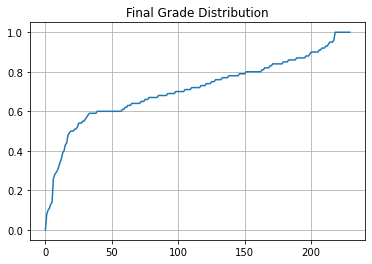

In [163]:
plt.plot(sorted(student_por_df['TGNorm']))
plt.title('Final Grade Distribution')
plt.grid()

##### Exploration and feature engineering

In [164]:
list(student_por_df._get_numeric_data())

['AgeCourseStart',
 'TGNorm',
 'AGE_ADMITTED',
 'Reg_Hrs',
 'HS_GPA',
 'MATH',
 'PHYS',
 'Repeated_Grade_ITBP119_CSBP119',
 'ITBP119_CSBP119_max',
 'Repeated_Grade_ITBP219_CSBP219',
 'ESPN',
 'CSBP121',
 'MATH105',
 'CENG205',
 'PHYS105',
 'CENG202',
 'CIT',
 'AcademicStanding',
 'Citizenship',
 'Gender',
 'Sponsor',
 'Resident_in_city']

In [165]:
# find all non-numerical data
non_numeric_features = [feat for feat in list(student_por_df) if feat not in list(student_por_df._get_numeric_data())]

for feat in non_numeric_features:
    print(feat, ':', set(student_por_df[feat]))

In [166]:
non_numeric_features

[]

In [167]:
for feat in non_numeric_features:
    dummies = pd.get_dummies(student_por_df[feat]).rename(columns=lambda x: feat + '_' + str(x))
    student_por_df = pd.concat([student_por_df, dummies], axis=1)
    


In [168]:
student_por_df.columns

Index(['AgeCourseStart', 'TGNorm', 'AGE_ADMITTED', 'Reg_Hrs', 'HS_GPA', 'MATH',
       'PHYS', 'Repeated_Grade_ITBP119_CSBP119', 'ITBP119_CSBP119_max',
       'Repeated_Grade_ITBP219_CSBP219', 'ESPN', 'CSBP121', 'MATH105',
       'CENG205', 'PHYS105', 'CENG202', 'CIT', 'AcademicStanding',
       'Citizenship', 'Gender', 'Sponsor', 'Resident_in_city'],
      dtype='object')

In [169]:
student_por_df = student_por_df[[feat for feat in list(student_por_df) if feat not in non_numeric_features]]
student_por_df.shape

(230, 22)

In [170]:
# create an xgboost model
# run simple xgboost classification model and check 
# prep modeling code
columns=['AgeCourseStart',  'AGE_ADMITTED', 'Reg_Hrs', 'HS_GPA', 'MATH',
       'PHYS', 'Repeated_Grade_ITBP119_CSBP119', 'ITBP119_CSBP119_max',
       'Repeated_Grade_ITBP219_CSBP219', 'ESPN', 'CSBP121', 'MATH105',
       'CENG205', 'PHYS105', 'CENG202', 'CIT', 'AcademicStanding',
       'Citizenship', 'Gender', 'Sponsor', 'Resident_in_city']
outcome = 'TGNorm'
features = [feat for feat in list(student_por_df) if feat not in outcome]
features1 = [feat for feat in list(student_por_df) if feat not in outcome]
features2 = [feat for feat in list(student_por_df) if feat  in outcome]

X_train, X_test, y_train, y_test = train_test_split(student_por_df[features], 
                                                 student_por_df[features2], 
                                                 test_size=0.25, 
                                                 random_state=42)




In [171]:
linear = LinearRegression()
linear.fit(X_train, y_train)
preds_linear = linear.predict(student_por_df[features])
preds_linear

array([[0.96022099],
       [0.86206907],
       [0.78674261],
       [0.85812566],
       [0.93245356],
       [0.85015982],
       [0.84350883],
       [0.87984317],
       [0.64387344],
       [0.92449023],
       [0.85975089],
       [0.88560964],
       [0.87997913],
       [0.65494187],
       [0.85942081],
       [0.6766236 ],
       [0.72430424],
       [0.87528706],
       [0.67129507],
       [0.74260725],
       [0.60082976],
       [0.83309559],
       [0.77258653],
       [0.80909281],
       [0.91785295],
       [0.62170316],
       [0.87332615],
       [0.59962811],
       [0.90162836],
       [0.85004751],
       [0.49725465],
       [0.79744202],
       [0.98338706],
       [0.75361279],
       [0.91159905],
       [0.94775589],
       [0.90130444],
       [0.77504303],
       [0.96099176],
       [0.47043439],
       [0.77109653],
       [0.79435007],
       [0.7604241 ],
       [0.4635891 ],
       [0.73836548],
       [0.66320202],
       [0.9820832 ],
       [0.921

In [172]:
import pickle
# save the model to disk
filename1 = 'streamlit_student_grade_prediction2.pkl'
pickle.dump(linear, open(filename1, 'wb'))

In [104]:
# load the model from disk
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(X_test, y_test)
#print(result)

In [173]:
preds = linear.predict(student_por_df[features])
preds

array([[0.96022099],
       [0.86206907],
       [0.78674261],
       [0.85812566],
       [0.93245356],
       [0.85015982],
       [0.84350883],
       [0.87984317],
       [0.64387344],
       [0.92449023],
       [0.85975089],
       [0.88560964],
       [0.87997913],
       [0.65494187],
       [0.85942081],
       [0.6766236 ],
       [0.72430424],
       [0.87528706],
       [0.67129507],
       [0.74260725],
       [0.60082976],
       [0.83309559],
       [0.77258653],
       [0.80909281],
       [0.91785295],
       [0.62170316],
       [0.87332615],
       [0.59962811],
       [0.90162836],
       [0.85004751],
       [0.49725465],
       [0.79744202],
       [0.98338706],
       [0.75361279],
       [0.91159905],
       [0.94775589],
       [0.90130444],
       [0.77504303],
       [0.96099176],
       [0.47043439],
       [0.77109653],
       [0.79435007],
       [0.7604241 ],
       [0.4635891 ],
       [0.73836548],
       [0.66320202],
       [0.9820832 ],
       [0.921

In [106]:
# Import the model we are using
rf = RandomForestRegressor(n_estimators = 500, bootstrap=True,max_depth=50,max_features=4,min_samples_leaf=7,min_samples_split=10,
                           random_state = 42)

rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=50, max_features=4, min_samples_leaf=7,
                      min_samples_split=10, n_estimators=500, random_state=42)

In [107]:
#preds = rf.predict(student_por_df[features])
#preds

In [108]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(linear, student_por_df[features], student_por_df[outcome], scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.094 (0.019)


In [109]:
prediction=linear.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test, linear.predict(X_test)))

print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

R2 Value: 0.14400331603839567
Accuracy TGNorm   -inf
dtype: float64


In [110]:
student_por_df[features]

,AgeCourseStart,AGE_ADMITTED,Reg_Hrs,HS_GPA,MATH,PHYS,Repeated_Grade_ITBP119_CSBP119,ITBP119_CSBP119_max,Repeated_Grade_ITBP219_CSBP219,ESPN,...,MATH105,CENG205,PHYS105,CENG202,CIT,AcademicStanding,Citizenship,Gender,Sponsor,Resident_in_city
0,19.02,18,16,1.0000,1.000,1.000,0,0.90,0,0.90,...,0.90,0.90,0.90,0.90,1,1,0,1,1,0
1,20.78,19,13,0.9780,1.000,1.000,0,0.84,0,0.90,...,0.90,0.90,0.84,0.90,1,1,0,1,1,0
2,24.65,22,12,0.9560,1.000,1.000,0,0.90,0,0.90,...,0.90,0.98,0.90,0.92,0,1,0,0,1,0
3,20.61,19,13,1.0000,1.000,1.000,0,0.90,0,0.90,...,0.90,0.90,0.87,0.87,1,1,0,1,1,0
4,17.72,16,16,0.9557,1.000,1.000,0,0.87,0,0.90,...,0.90,0.90,0.90,0.84,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,20.14,17,13,0.8550,0.610,0.620,0,0.80,0,0.74,...,0.77,0.77,0.77,0.77,1,1,1,0,0,1
226,19.53,17,13,0.7710,0.747,0.616,2,0.74,0,0.80,...,0.60,0.00,0.76,0.00,1,0,1,1,0,0
227,19.01,17,13,0.8050,0.712,0.607,0,0.87,0,0.84,...,0.60,0.77,0.60,0.64,1,1,1,1,0,0
228,19.29,18,13,0.8677,0.817,0.600,0,0.70,0,0.77,...,0.67,0.67,0.60,0.64,1,1,1,1,0,0


In [174]:
preds_final=pd.DataFrame(preds,columns=['TGNorm'])
preds_final['TGNorm']

0      0.960221
1      0.862069
2      0.786743
3      0.858126
4      0.932454
         ...   
225    0.701327
226    0.485424
227    0.765123
228    0.689700
229    0.853214
Name: TGNorm, Length: 230, dtype: float64

In [175]:
condition1=preds_final['TGNorm'] <=0.70
condition2=preds_final['TGNorm'] >=0.50
predicted_students_in_trouble=preds_final[condition1 & condition2]

In [176]:
predicted_students_in_trouble

,TGNorm
8,0.643873
13,0.654942
15,0.676624
18,0.671295
20,0.600830
...,...
215,0.602190
220,0.644285
222,0.531590
224,0.662516


In [149]:
predicted_students_in_trouble.iloc[1, 0]


0.6549418682169716

In [114]:
# Saving feature names for later use
feature_list = list(columns)
feature_list

['AgeCourseStart',
 'AGE_ADMITTED',
 'Reg_Hrs',
 'HS_GPA',
 'MATH',
 'PHYS',
 'Repeated_Grade_ITBP119_CSBP119',
 'ITBP119_CSBP119_max',
 'Repeated_Grade_ITBP219_CSBP219',
 'ESPN',
 'CSBP121',
 'MATH105',
 'CENG205',
 'PHYS105',
 'CENG202',
 'CIT',
 'AcademicStanding',
 'Citizenship',
 'Gender',
 'Sponsor',
 'Resident_in_city']

In [115]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('CSBP121', 0.21),
 ('CENG205', 0.14),
 ('ITBP119_CSBP119_max', 0.12),
 ('PHYS105', 0.09),
 ('Repeated_Grade_ITBP219_CSBP219', 0.08),
 ('CENG202', 0.08),
 ('HS_GPA', 0.05),
 ('MATH', 0.05),
 ('MATH105', 0.05),
 ('PHYS', 0.04),
 ('ESPN', 0.04),
 ('AgeCourseStart', 0.02),
 ('AGE_ADMITTED', 0.01),
 ('Reg_Hrs', 0.01),
 ('Repeated_Grade_ITBP119_CSBP119', 0.01),
 ('Resident_in_city', 0.01),
 ('CIT', 0.0),
 ('AcademicStanding', 0.0),
 ('Citizenship', 0.0),
 ('Gender', 0.0),
 ('Sponsor', 0.0)]

In [116]:
# get dataframe version of important feature for model 
rf_fea_imp=pd.DataFrame(feature_importances,
columns=['feature','importance']).sort_values('importance', ascending=False)
rf_fea_imp.head(10)

,feature,importance
0,CSBP121,0.21
1,CENG205,0.14
2,ITBP119_CSBP119_max,0.12
3,PHYS105,0.09
4,Repeated_Grade_ITBP219_CSBP219,0.08
5,CENG202,0.08
6,HS_GPA,0.05
7,MATH,0.05
8,MATH105,0.05
10,ESPN,0.04


In [117]:
#key_features = list(rf_fea_imp['feature'].values[0:10])
#key_features
key_features=['AgeCourseStart',
 'AGE_ADMITTED',
 'Reg_Hrs',
 'HS_GPA',
 'MATH',
 'PHYS',
 'Repeated_Grade_ITBP119_CSBP119',
 'ITBP119_CSBP119_max',
 'Repeated_Grade_ITBP219_CSBP219',
 'ESPN',
 'CSBP121',
 'MATH105',
 'CENG205',
 'PHYS105',
 'CENG202',
 'CIT',
 'AcademicStanding',
 'Citizenship',
 'Gender',
 'Sponsor',
 'Resident_in_city']

In [118]:
 '''key_features=['CSBP121',
 'CENG205',
 'ITBP119_CSBP119_max',
 'PHYS105',
 'Repeated_Grade_ITBP219_CSBP219',
 'CENG202',
 'HS_GPA',
 'MATH',
 'MATH105',
 'ESPN']'''

"key_features=['CSBP121',\n'CENG205',\n'ITBP119_CSBP119_max',\n'PHYS105',\n'Repeated_Grade_ITBP219_CSBP219',\n'CENG202',\n'HS_GPA',\n'MATH',\n'MATH105',\n'ESPN']"

In [150]:
predicted_students_in_trouble = preds_final[preds_final['TGNorm'] <= 0.70]
excludedList=['CIT','AcademicStanding','Citizenship','Gender','Sponsor','Resident_in_city']
# See which feature they landed well below or well above peers
for index, row in predicted_students_in_trouble.iterrows():
    print('Student ID:', index, ' TGNorm:',row['TGNorm'])
    for feat in key_features:
        row_df=student_por_df[features][index:index+1]
        if(feat=="Repeated_Grade_ITBP219_CSBP219" or feat=="Repeated_Grade_ITBP119_CSBP119"):
            if float(row_df[feat])>0:
                print('\t', feat,' :', int(row_df[feat]))
        elif(feat in excludedList):
             print('\t', feat,' :', int(row_df[feat]))
        else:
            if float(row_df[feat]) < student_por_df[feat].quantile(0.25):
                print('\t', 'Below:', feat, float(row_df[feat]), 'Class:', 
                      np.round(np.mean(student_por_df[feat]),2))
            if float(row_df[feat]) > student_por_df[feat].quantile(0.75):
                print('\t','Above:', feat, float(row_df[feat]), 'Class:', 
                      np.round(np.mean(student_por_df[feat]),2))

Student ID: 8  TGNorm: 0.6438734386387328
	 Below: AgeCourseStart 18.67 Class: 19.57
	 Above: HS_GPA 0.948 Class: 0.89
	 Above: MATH 0.948 Class: 0.83
	 Above: PHYS 0.9940000000000001 Class: 0.82
	 Below: CSBP121 0.6 Class: 0.76
	 Below: MATH105 0.6 Class: 0.73
	 Below: CENG205 0.6 Class: 0.78
	 CIT  : 1
	 AcademicStanding  : 1
	 Citizenship  : 1
	 Gender  : 1
	 Sponsor  : 0
	 Resident_in_city  : 0
Student ID: 13  TGNorm: 0.6549418682169716
	 Below: AgeCourseStart 18.71 Class: 19.57
	 Below: Reg_Hrs 11.0 Class: 13.5
	 Above: MATH 0.98 Class: 0.83
	 Above: PHYS 0.98 Class: 0.82
	 Below: ITBP119_CSBP119_max 0.67 Class: 0.77
	 Below: CENG205 0.7 Class: 0.78
	 Below: CENG202 0.6 Class: 0.75
	 CIT  : 1
	 AcademicStanding  : 1
	 Citizenship  : 1
	 Gender  : 1
	 Sponsor  : 1
	 Resident_in_city  : 0
Student ID: 15  TGNorm: 0.6766235969407817
	 Above: AgeCourseStart 20.36 Class: 19.57
	 Above: HS_GPA 0.9790000000000001 Class: 0.89
	 Above: MATH 0.973 Class: 0.83
	 Above: PHYS 0.973 Class: 0.82


	 Repeated_Grade_ITBP219_CSBP219  : 2
	 Below: MATH105 0.6 Class: 0.73
	 Below: CENG205 0.7 Class: 0.78
	 Above: CENG202 0.9 Class: 0.75
	 CIT  : 1
	 AcademicStanding  : 1
	 Citizenship  : 1
	 Gender  : 1
	 Sponsor  : 0
	 Resident_in_city  : 1
Student ID: 110  TGNorm: 0.6952702383740296
	 Above: AgeCourseStart 20.16 Class: 19.57
	 Below: CENG202 0.6 Class: 0.75
	 CIT  : 1
	 AcademicStanding  : 1
	 Citizenship  : 1
	 Gender  : 1
	 Sponsor  : 0
	 Resident_in_city  : 1
Student ID: 111  TGNorm: 0.6180072643452706
	 Below: ITBP119_CSBP119_max 0.67 Class: 0.77
	 Below: MATH105 0.6 Class: 0.73
	 CIT  : 1
	 AcademicStanding  : 1
	 Citizenship  : 1
	 Gender  : 1
	 Sponsor  : 0
	 Resident_in_city  : 0
Student ID: 116  TGNorm: 0.5450099751594509
	 Below: AGE_ADMITTED 16.0 Class: 17.47
	 Below: Reg_Hrs 12.0 Class: 13.5
	 Below: HS_GPA 0.83 Class: 0.89
	 Repeated_Grade_ITBP119_CSBP119  : 2
	 Repeated_Grade_ITBP219_CSBP219  : 2
	 Below: CSBP121 0.64 Class: 0.76
	 Below: MATH105 0.6 Class: 0.73
	 Bel

Student ID: 163  TGNorm: 0.49537952579593625
	 Above: AgeCourseStart 21.15 Class: 19.57
	 Below: MATH 0.7 Class: 0.83
	 Below: ITBP119_CSBP119_max 0.67 Class: 0.77
	 Repeated_Grade_ITBP219_CSBP219  : 2
	 Above: ESPN 0.87 Class: 0.78
	 Below: CSBP121 0.6 Class: 0.76
	 Below: MATH105 0.6 Class: 0.73
	 CIT  : 1
	 AcademicStanding  : 1
	 Citizenship  : 1
	 Gender  : 0
	 Sponsor  : 0
	 Resident_in_city  : 1
Student ID: 166  TGNorm: 0.5121370006125825
	 Above: AgeCourseStart 20.73 Class: 19.57
	 Below: MATH 0.7140000000000001 Class: 0.83
	 Repeated_Grade_ITBP119_CSBP119  : 2
	 Repeated_Grade_ITBP219_CSBP219  : 2
	 Below: CENG205 0.7 Class: 0.78
	 Above: PHYS105 0.84 Class: 0.7
	 CIT  : 1
	 AcademicStanding  : 1
	 Citizenship  : 1
	 Gender  : 1
	 Sponsor  : 0
	 Resident_in_city  : 0
Student ID: 169  TGNorm: 0.40229513003035067
	 Above: AgeCourseStart 20.16 Class: 19.57
	 Below: HS_GPA 0.784 Class: 0.89
	 Below: MATH 0.7 Class: 0.83
	 Repeated_Grade_ITBP119_CSBP119  : 2
	 Below: ITBP119_CSBP11

	 Resident_in_city  : 1
Student ID: 212  TGNorm: 0.4869623176228468
	 Below: Reg_Hrs 12.0 Class: 13.5
	 Below: HS_GPA 0.815 Class: 0.89
	 Below: MATH 0.672 Class: 0.83
	 Below: PHYS 0.674 Class: 0.82
	 Repeated_Grade_ITBP219_CSBP219  : 2
	 Below: CSBP121 0.64 Class: 0.76
	 Above: CENG202 0.9 Class: 0.75
	 CIT  : 1
	 AcademicStanding  : 1
	 Citizenship  : 1
	 Gender  : 1
	 Sponsor  : 0
	 Resident_in_city  : 1
Student ID: 213  TGNorm: 0.6960792301982646
	 Above: Reg_Hrs 14.0 Class: 13.5
	 Below: HS_GPA 0.802 Class: 0.89
	 Below: MATH 0.644 Class: 0.83
	 Below: PHYS 0.6709999999999999 Class: 0.82
	 Below: MATH105 0.6 Class: 0.73
	 CIT  : 1
	 AcademicStanding  : 1
	 Citizenship  : 1
	 Gender  : 1
	 Sponsor  : 0
	 Resident_in_city  : 0
Student ID: 214  TGNorm: 0.6284528670397652
	 Above: AgeCourseStart 20.23 Class: 19.57
	 Below: HS_GPA 0.8290000000000001 Class: 0.89
	 Below: PHYS 0.669 Class: 0.82
	 Below: ESPN 0.6 Class: 0.78
	 Below: CSBP121 0.64 Class: 0.76
	 CIT  : 1
	 AcademicStanding

In [120]:
len(predicted_students_in_trouble)

95

In [124]:
 #for feat in key_features:
        #print(feat,student_por_df[feat].quantile(0.25))

In [84]:
'''MTNorm_75 =0.85
HW1Norm_75 = 1.0
Quiz1Norm_75 = 0.83
CSBP121_75 = 0.9
Repeated_Grade_ITBP219_CSBP219_75 = 0.0
ITBP119_CSBP119_max_75 = 0.87
CENG202_75 = 0.87
PHYS105_75 = 0.8
CENG205_75 = 0.9
ESPN_75 = 0.84'''

In [85]:
'''dict_75 = {}

dict_75["MTNorm_75"] =0.85
dict_75["HW1Norm_75"] = 1.0
dict_75["Quiz1Norm_75"] = 0.83
dict_75["CSBP121_75"] = 0.9
dict_75["Repeated_Grade_ITBP219_CSBP219_75"] = 0.0
dict_75["ITBP119_CSBP119_max_75"] = 0.87
dict_75["CENG202_75"] = 0.87
dict_75["PHYS105_75"] = 0.8
dict_75["CENG205_75"] = 0.9
dict_75["ESPN_75"] = 0.84'''

In [125]:
for feat in key_features:
    print(feat,np.round(np.mean(student_por_df[feat]),2))

AgeCourseStart 19.57
AGE_ADMITTED 17.47
Reg_Hrs 13.5
HS_GPA 0.89
MATH 0.83
PHYS 0.82
Repeated_Grade_ITBP119_CSBP119 0.2
ITBP119_CSBP119_max 0.77
Repeated_Grade_ITBP219_CSBP219 0.24
ESPN 0.78
CSBP121 0.76
MATH105 0.73
CENG205 0.78
PHYS105 0.7
CENG202 0.75
CIT 0.91
AcademicStanding 0.95
Citizenship 0.92
Gender 0.74
Sponsor 0.15
Resident_in_city 0.5


In [126]:
AgeCourseStart_mean= 19.57
AGE_ADMITTED_mean= 17.47
Reg_Hrs_mean= 13.5
HS_GPA_mean= 0.89
MATH_mean= 0.83
PHYS_mean= 0.82
ITBP119_CSBP119_max_mean= 0.77
ESPN_mean= 0.78
CSBP121_mean= 0.76
MATH105_mean= 0.73
CENG205_mean= 0.78
PHYS105_mean= 0.7
CENG202_mean= 0.75


In [127]:
dict_mean = {}


dict_mean["AgeCourseStart_mean"]= 19.57
dict_mean["AGE_ADMITTED_mean"]= 17.47
dict_mean["Reg_Hrs_mean"]= 13.5
dict_mean["HS_GPA_mean"]= 0.89
dict_mean["MATH_mean"]= 0.83
dict_mean["PHYS_mean"]= 0.82
dict_mean["Repeated_Grade_ITBP119_CSBP119_mean"]= 0.2
dict_mean["ITBP119_CSBP119_max_mean"]= 0.77
dict_mean["Repeated_Grade_ITBP219_CSBP219_mean"]= 0.24
dict_mean["ESPN_mean"]= 0.78
dict_mean["CSBP121_mean"]= 0.76
dict_mean["MATH105_mean"]= 0.73
dict_mean["CENG205_mean"]= 0.78
dict_mean["PHYS105_mean"]= 0.7
dict_mean["CENG202_mean"]= 0.75

